In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")
df.head()

,test_id,robot_count,mission_size,inventory_id,scenario,mode,completion_time,average_idle_time
0,test_5_20_t_cleaning_i0_multi3,5,20,0,cleaning,multi3,346.502181,132.007187
1,test_2_10_t_logistics_i1_bl0,2,10,1,logistics,bl0,574.502090,281.112408
2,test_5_2_t_logistics_i2_bl1,5,2,2,logistics,bl1,132.022595,104.401405
3,test_5_10_t_agriculture_i0_bl1,5,10,0,agriculture,bl1,487.502183,384.156691
4,test_5_10_t_cleaning_i0_bl1,5,10,0,cleaning,bl1,411.021581,326.356485


In [10]:
# import pandas as pd

# Load the CSV file
xdf = pd.read_csv("data.csv")

# Select the identifier columns
index_cols = ["scenario", "robot_count", "mission_size", "inventory_id"]

# Pivot the table to widen by mode
pivot_df = xdf.pivot_table(
    index=index_cols,
    columns="mode",
    values=["completion_time", "average_idle_time"]
)

# Flatten the MultiIndex columns (e.g., ('completion_time', 'bl0') → 'completion_time_bl0')
pivot_df.columns = [f"{metric}_{mode}" for metric, mode in pivot_df.columns]

# Reset index to turn identifier columns back into regular columns
pivot_df = pivot_df.reset_index()


In [11]:
pivot_df

,scenario,robot_count,mission_size,inventory_id,average_idle_time_bl0,average_idle_time_bl1,average_idle_time_bl2,average_idle_time_multi3,completion_time_bl0,completion_time_bl1,completion_time_bl2,completion_time_multi3
0,agriculture,2,2,0,53.987119,56.234637,56.242900,15.759203,109.501845,112.502030,111.010839,82.502096
1,agriculture,2,2,1,56.986804,60.725912,61.477342,25.494551,118.502107,123.010798,121.502105,94.502047
2,agriculture,2,2,2,48.738888,50.239230,48.731300,32.253570,100.502047,102.010932,103.502018,96.010862
3,agriculture,2,10,0,223.412053,221.928355,226.359583,155.999570,466.502135,463.502027,481.501993,433.501345
4,agriculture,2,10,1,221.893832,222.660397,221.900636,63.748934,454.502148,453.010962,451.502137,334.502045
...,...,...,...,...,...,...,...,...,...,...,...,...
103,surveillance,10,10,1,393.784052,396.776165,391.431796,189.841525,439.501199,442.502126,438.040658,241.502167
104,surveillance,10,10,2,391.234257,393.324307,390.317960,171.537432,436.502211,439.502119,436.502125,223.502141
105,surveillance,10,20,0,698.429463,699.027677,695.722979,335.027030,778.502141,778.502222,775.502245,433.502152
106,surveillance,10,20,1,784.493606,784.361391,785.245762,396.106634,879.039961,879.040279,879.041196,495.040131


In [12]:
import matplotlib.pyplot as plt

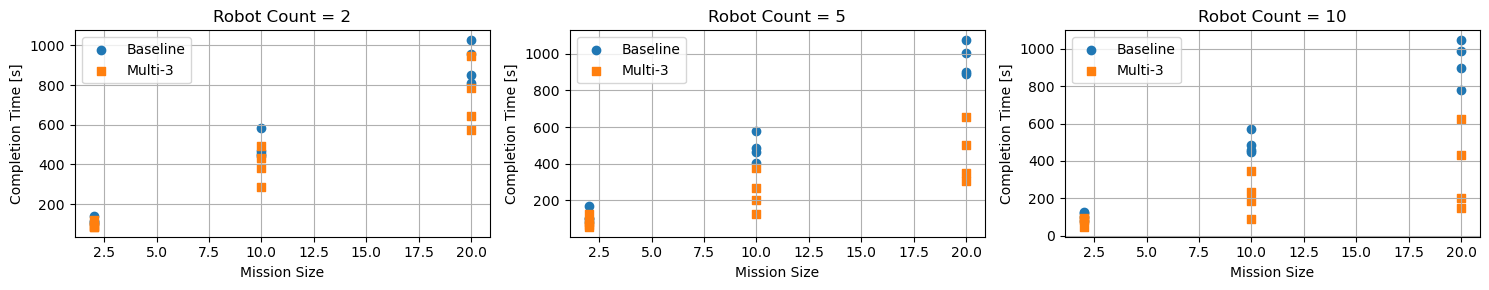

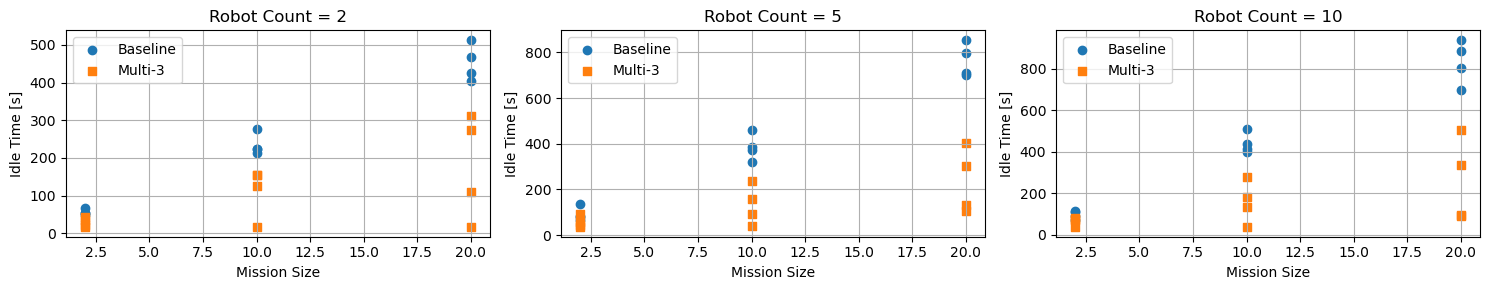

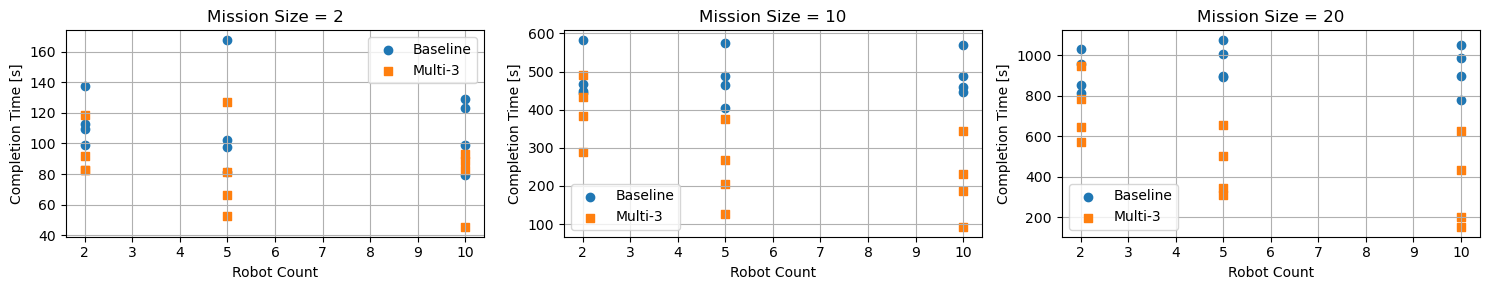

In [13]:
def multiplot(df,fname,external_variable,ext_values,var_x,var_y,title,x_label,y_label, inventory_id=0, scenario="agriculture"):
    """Receive title with a placeholder $field$"""
    # df = df[df["scenario"] == scenario]
    fig, axes = plt.subplots(1, 3, figsize=(15, 3))
    for i, v in enumerate(ext_values):
        x_df = df[ (df[external_variable] == v) & \
                   (df["inventory_id"] == inventory_id)
             ][[var_x,var_y,"mode"]]
        fil_bl0_df = x_df[x_df["mode"] == "bl0"]
        sort_bl0_df = fil_bl0_df.sort_values(by=var_x)

        fil_m3_df = x_df[x_df["mode"] == "multi3"]
        sort_m3_df = fil_m3_df.sort_values(by=var_x)

        bl_x = sort_bl0_df[var_x].to_numpy()
        bl_y = sort_bl0_df[var_y].to_numpy()
        m3_x = sort_m3_df[var_x].to_numpy()
        m3_y = sort_m3_df[var_y].to_numpy()

        axes[i].scatter(bl_x,bl_y, marker='o', label='Baseline')
        axes[i].scatter(m3_x,m3_y, marker='s', label='Multi-3')
        axes[i].set_title(title.replace("$field$",str(v)))
        axes[i].set_ylabel(y_label)
        axes[i].set_xlabel(x_label)
        axes[i].legend()
        axes[i].grid()
    plt.tight_layout()
    plt.savefig(fname, format="pdf")
    plt.show()

multiplot(df, "images/ct_by_rc4.pdf", "robot_count", [2,5,10],"mission_size"
        ,"completion_time","Robot Count = $field$", "Mission Size", "Completion Time [s]",0)
multiplot(df, "images/it_by_rc4.pdf", "robot_count", [2,5,10],"mission_size"
        ,"average_idle_time","Robot Count = $field$", "Mission Size", "Idle Time [s]",0)

multiplot(df, "images/ct_by_ms4.pdf", "mission_size", [2,10,20],"robot_count"
        ,"completion_time","Mission Size = $field$", "Robot Count", "Completion Time [s]",0)
# multiplot(df, "images/it_by_ms4.pdf", "mission_size", [2,10,15,20],"robot_count"
#         ,"average_idle_time","Mission Size = $field$", "Robot Count", "Idle Time [s]",0)


## Box Plot
* Create a box plot for these

In [14]:
# Box Plot
# [X]Create a box plot for these 

# Tables
# Rows --> Different configurations
# Columns --> Completion Time - M3 / Best Baseline / Delta Pct | Idle time M3 / Best Baseline / Delta Pct

# In the paper:
# Redo the image for the Software Architecture and talk about the components

## Analyzing Variability among different trials

In [15]:
from collections import defaultdict

def compute_std(df):
    total_std = defaultdict(float)
    cnt = 0
    for rc in [2,5,10]:
        for ms in [2,10,20]:
            for sc in ["agriculture","cleaning","logistics","surveillance"]:
                mini_df = df[(df["robot_count"] == rc) & \
                            (df["mission_size"] == ms) & \
                            (df["scenario"] == sc)]

                modes = ["bl0","bl1","bl2","multi3"]
                for m in modes:
                    std = mini_df[f"completion_time_{m}"].std()
                    mean = mini_df[f"completion_time_{m}"].mean()
                    total_std[m] += std/mean
                    cnt += 1

    for k,v in total_std.items():
        total_std[k] = v/cnt

    return total_std

compute_std(pivot_df)

defaultdict(float,
            {'bl0': 0.01715559300542713,
             'bl1': 0.018049554711108327,
             'bl2': 0.0167634483634033,
             'multi3': 0.026719494006294413})

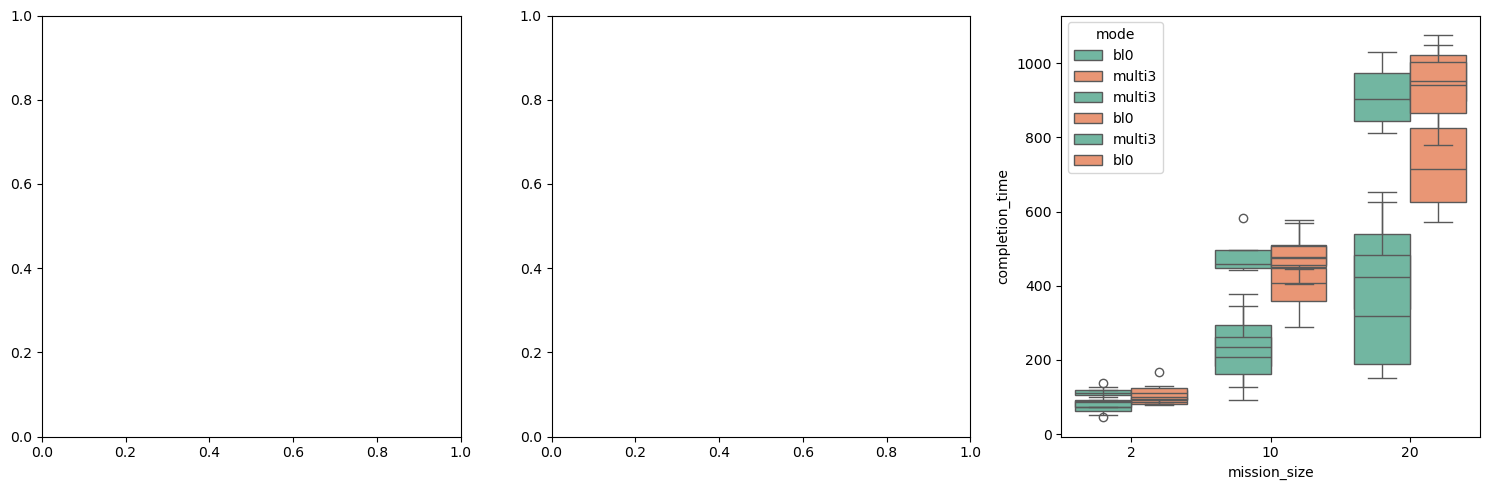

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def multiplot(df, fname, external_variable, ext_values, var_x, var_y, title, x_label, y_label, inventory_id=0, scenario="agriculture"):
    """Receive title with a placeholder $field$"""
    # df = df[df["scenario"] == scenario]
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for i, v in enumerate(ext_values):
        # Filter dataframe
        x_df = df[ (df[external_variable] == v) & \
                   (df["inventory_id"] == inventory_id) &
                   ((df["mode"] == "bl0") | (df["mode"] == "multi3"))
             ][[var_x, var_y, "mode"]]

        # Create line plots for Baseline (bl0) and Multi-3 (multi3)
        fil_bl0_df = x_df[x_df["mode"] == "bl0"]
        sort_bl0_df = fil_bl0_df.sort_values(by=var_x)

        fil_m3_df = x_df[x_df["mode"] == "multi3"]
        sort_m3_df = fil_m3_df.sort_values(by=var_x)

        bl_x = sort_bl0_df[var_x].to_numpy()
        bl_y = sort_bl0_df[var_y].to_numpy()
        m3_x = sort_m3_df[var_x].to_numpy()
        m3_y = sort_m3_df[var_y].to_numpy()

        # # Plotting line plots
        # axes[i].plot(bl_x, bl_y, marker='o', label='Baseline')
        # axes[i].plot(m3_x, m3_y, marker='s', label='Multi-3')
        # axes[i].set_title(title.replace("$field$", str(v)))
        # axes[i].set_ylabel(y_label)
        # axes[i].set_xlabel(x_label)
        # axes[i].legend()
        # axes[i].grid()

        # Box plot (additional statistical information)
        sns.boxplot(data=x_df, x=var_x, y=var_y, hue="mode", palette="Set2")

    plt.tight_layout()
    plt.savefig(fname, format="pdf")
    plt.show()

# Function call
multiplot(df, "images/ct_by_rc4.pdf", "robot_count", [2, 5, 10], "mission_size", "completion_time", 
          "Robot Count = $field$", "Mission Size", "Completion Time [s]", 0)

# multiplot(df, "images/it_by_rc4.pdf", "robot_count", [2, 5, 10], "mission_size", "average_idle_time", 
#           "Robot Count = $field$", "Mission Size", "Idle Time [s]", 0)

# multiplot(df, "images/ct_by_ms4.pdf", "mission_size", [2, 10, 20], "robot_count", "completion_time", 
#           "Mission Size = $field$", "Robot Count", "Completion Time [s]", 0)


In [17]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the built-in "tips" dataset from seaborn
tips_df = sns.load_dataset('tips')

# Create a boxplot
sns.boxplot(data=df, x="day", y="total_bill", hue="sex", palette="Set2")

# Adding labels and title
plt.title("Boxplot of Total Bill by Day and Sex")
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill ($)")

# Display the plot
plt.show()


ValueError: Could not interpret value `day` for `x`. An entry with this name does not appear in `data`.

In [19]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
sc = ["cleaning", "agriculture", "surveillance", "logistics" ]
for scenario in sc:
    mu_multi3 = df[(df["scenario"] == scenario) & (df["mode"] == "multi3")]["completion_time"].mean()
    mu_bl0 = df[(df["scenario"] == scenario) & (df["mode"] == "bl0")]["completion_time"].mean()
    mu_bl1 = df[(df["scenario"] == scenario) & (df["mode"] == "bl1")]["completion_time"].mean()
    mu_bl2 = df[(df["scenario"] == scenario) & (df["mode"] == "bl2")]["completion_time"].mean()
    mu_bl = min(mu_bl0, mu_bl1, mu_bl2)
    # print(mu_multi3)
    it_multi3 = df[(df["scenario"] == scenario) & (df["mode"] == "multi3")]["average_idle_time"].mean()
    it_bl0 = df[(df["scenario"] == scenario) & (df["mode"] == "bl0")]["average_idle_time"].mean()
    it_bl1 = df[(df["scenario"] == scenario) & (df["mode"] == "bl1")]["average_idle_time"].mean()
    it_bl2 = df[(df["scenario"] == scenario) & (df["mode"] == "bl2")]["average_idle_time"].mean()
    it_bl = min(it_bl0, it_bl1, it_bl2)


    print(f'Scenario: {scenario} | {mu_multi3} , {mu_bl} , {-100*(mu_multi3-mu_bl)/mu_bl}:|: {it_multi3} , {it_bl}, {-100*(it_multi3-it_bl)/it_bl}' )
    # print(df[df["scenario"] == scenario].describe())


# df[df["scenario"] == "agriculture" & df[""]]["completion_time"].mean()

Scenario: cleaning | 193.0134676915628 , 499.7885025430609 , 61.38097080876063:|: 42.91676887936063 , 365.037476627032, 88.24318826770497
Scenario: agriculture | 225.78779752166182 , 478.06799477118034 , 52.770777380792545:|: 73.56721321565134 , 346.57323431703776, 78.77296746223811
Scenario: surveillance | 318.51283849610223 , 462.9576978595168 , 31.200444453403595:|: 171.2897056385323 , 337.90760625291756, 49.308715616680985
Scenario: logistics | 420.62276303326644 , 583.0104405085245 , 27.853305222736182:|: 240.69073791239 , 425.3695515199944, 43.41608677623547


Text(0, 0.5, 'Completion Time (s)')

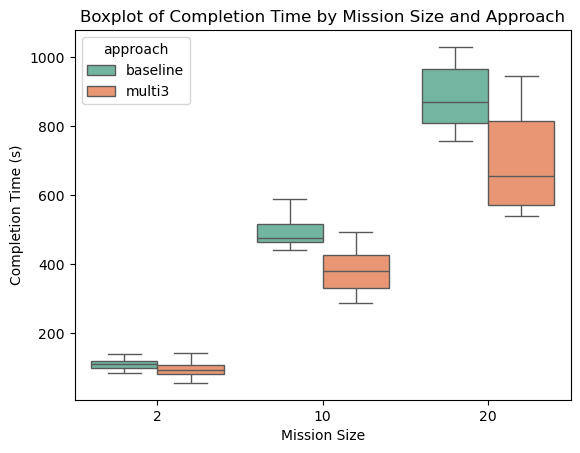

In [21]:
xx_df = df[ (df["robot_count"] == 2) #& \
                  #  (df["inventory_id"] == 0) & \
                  #  ((df["mode"] == "bl0") | (df["mode"] == "multi3"))
             ][["mission_size", "completion_time", "mode"]]

xx_df["approach"] = xx_df["mode"].apply(lambda x: "baseline" if (x == "bl0" or x == "bl1" or x == "bl2") else "multi3")
sns.boxplot(data=xx_df, x="mission_size", y="completion_time", hue="approach", palette="Set2")

# Adding labels and title
plt.title("Boxplot of Completion Time by Mission Size and Approach") 
plt.xlabel("Mission Size")
plt.ylabel("Completion Time (s)")

# Do a multiplot for the boxplot changing the robot count as in [2,5,10]


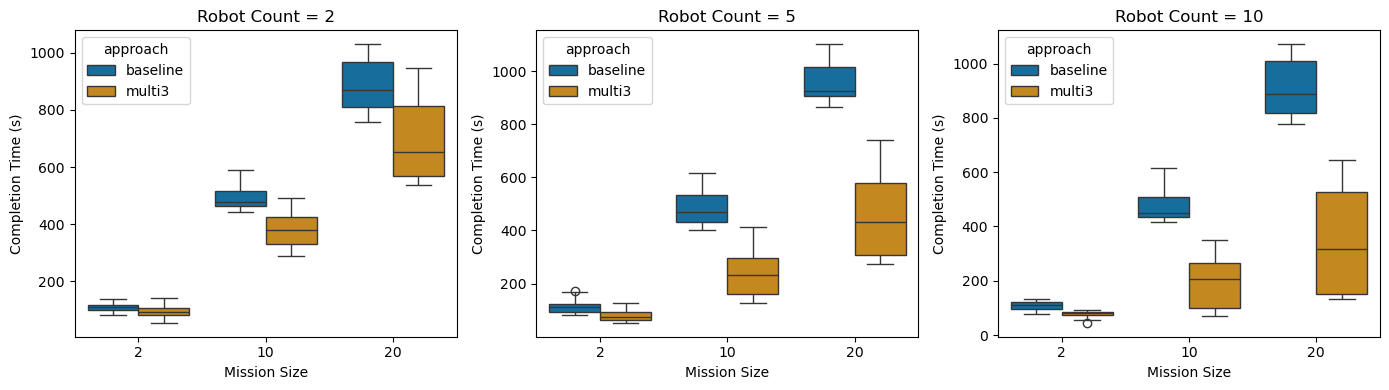

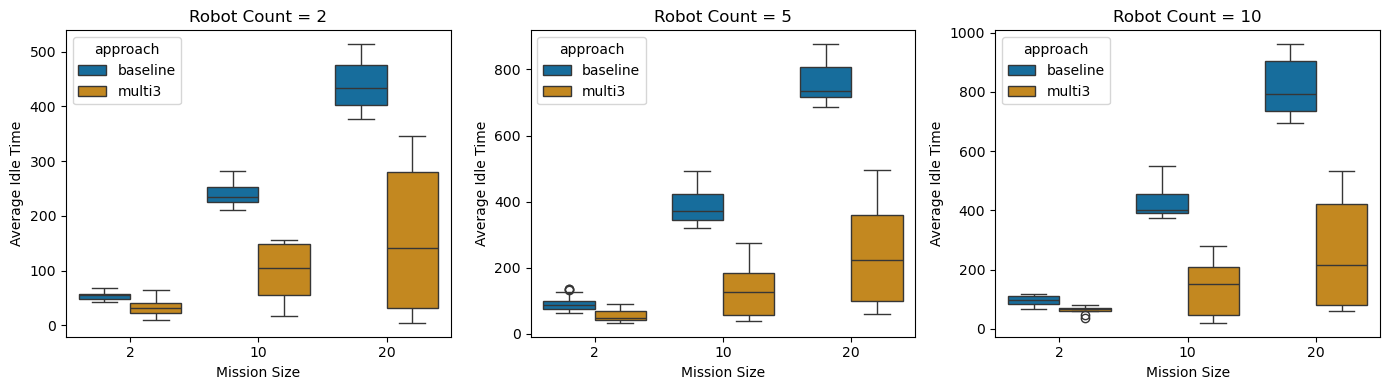

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a function to plot for different robot counts
def multiplot(df, robot_counts, title, x_label, y_label, output_pdf="boxplot_output.pdf", field="completion_time"):
    # Create subplots
    fig, axes = plt.subplots(1, len(robot_counts), figsize=(14, 4))
    
    for i, robot_count in enumerate(robot_counts):
        # Filter the data based on the robot_count
        xx_df = df[ (df["robot_count"] == robot_count) ][["mission_size", field, "mode"]]
        
        # Apply the "approach" column
        xx_df["approach"] = xx_df["mode"].apply(lambda x: "baseline" if (x == "bl0" or x == "bl1" or x == "bl2") else "multi3")
        
        # Create a boxplot
        sns.boxplot(data=xx_df, x="mission_size", y=field, hue="approach", palette="colorblind", ax=axes[i])

        # Set title and labels for each subplot
        axes[i].set_title(f"Robot Count = {robot_count}")
        axes[i].set_xlabel(x_label)
        axes[i].set_ylabel(y_label)
    
    # Adjust layout
    plt.tight_layout()
    plt.savefig(output_pdf, format="pdf")
    plt.grid()
    plt.show()

# Call the function with the robot_count values [2, 5, 10]
multiplot(df, [2, 5, 10], "Robot Count", "Mission Size", "Completion Time (s)", "images/ct_by_robot_count.pdf", "completion_time")
multiplot(df, [2, 5, 10], "Robot Count", "Mission Size", "Average Idle Time", "images/it_by_robot_count.pdf", "average_idle_time")


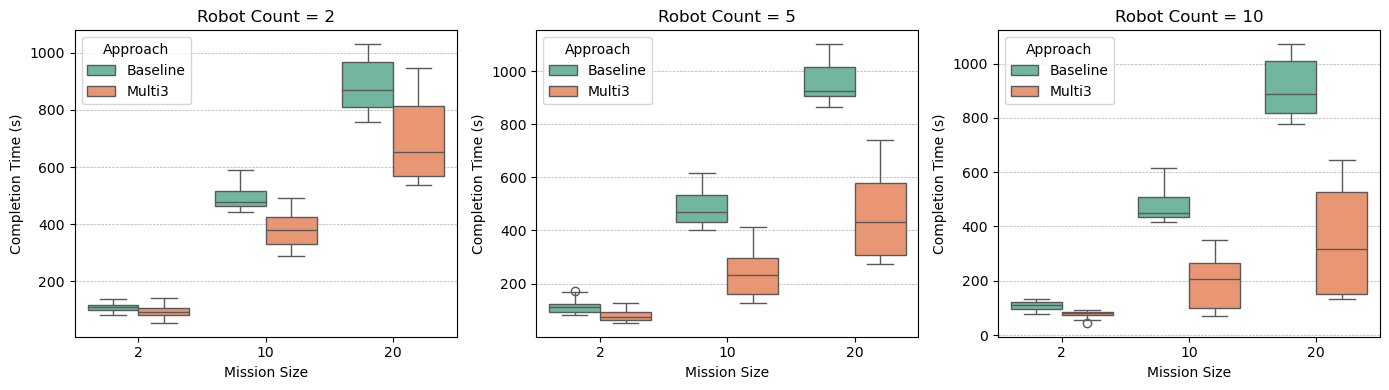

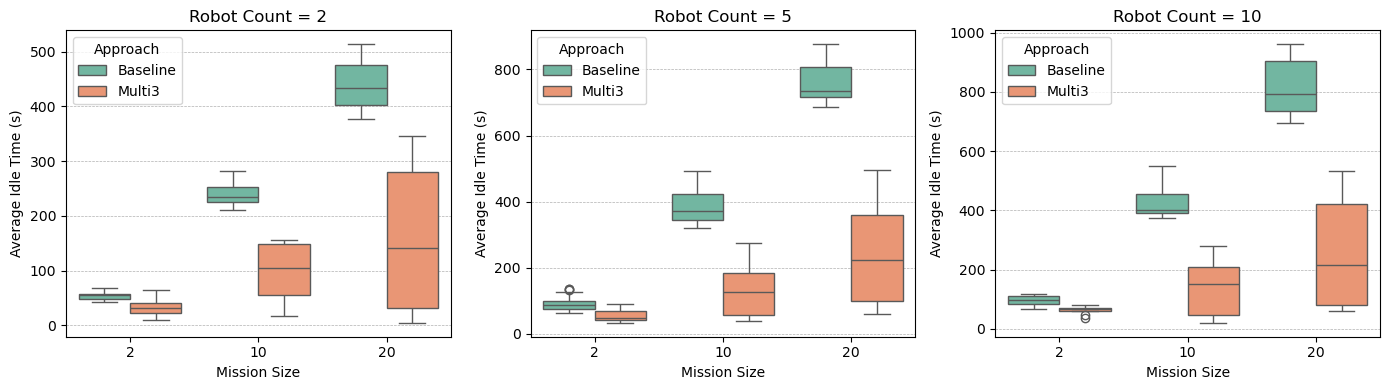

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def multiplot(df, robot_counts, title, x_label, y_label, output_pdf="boxplot_output.pdf", field="completion_time"):
    fig, axes = plt.subplots(1, len(robot_counts), figsize=(14, 4))
    
    for i, robot_count in enumerate(robot_counts):
        xx_df = df[df["robot_count"] == robot_count][["mission_size", field, "mode"]].copy()
        xx_df["Approach"] = xx_df["mode"].apply(lambda x: "Baseline" if x in {"bl0", "bl1", "bl2"} else "Multi3")
        
        sns.boxplot(data=xx_df, x="mission_size", y=field, hue="Approach", palette="Set2", ax=axes[i])

        axes[i].set_title(f"Robot Count = {robot_count}")
        axes[i].set_xlabel(x_label)
        axes[i].set_ylabel(y_label)
        
        # Enable horizontal grid lines
        axes[i].yaxis.grid(True, linestyle="--", linewidth=0.5)
    
    plt.tight_layout()
    plt.savefig(output_pdf, format="pdf")
    plt.show()

# Example usage with horizontal lines at y=50 and y=100
multiplot(df, [2, 5, 10], "Robot Count", "Mission Size", "Completion Time (s)", "images/ct_by_robot_count.pdf", "completion_time")
multiplot(df, [2, 5, 10], "Robot Count", "Mission Size", "Average Idle Time (s)", "images/it_by_robot_count.pdf", "average_idle_time")


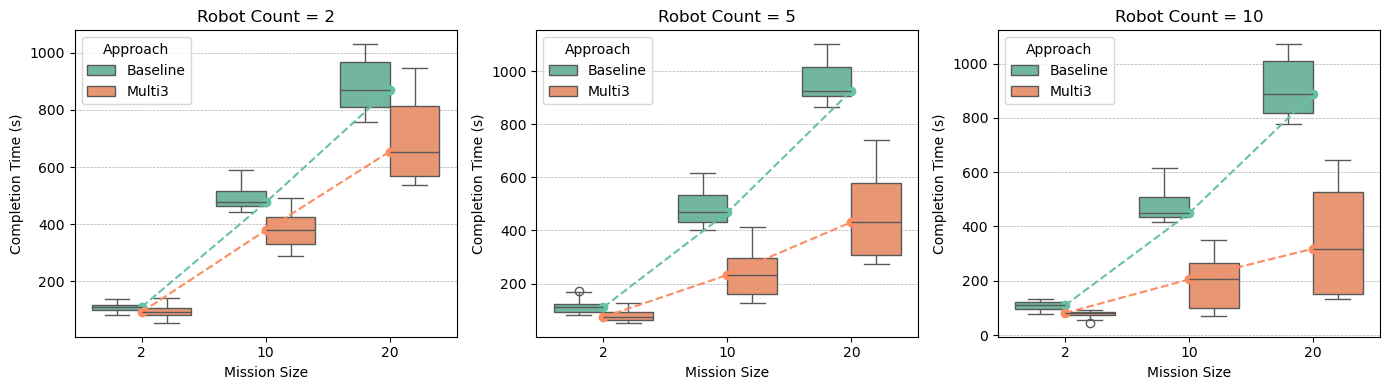

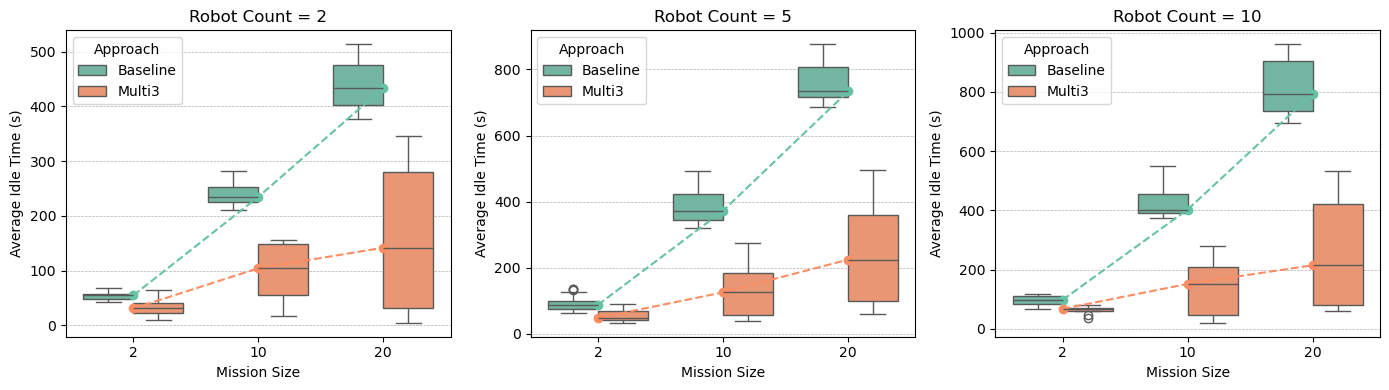

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def multiplot(df, robot_counts, title, x_label, y_label, output_pdf="boxplot_output.pdf", field="completion_time"):
    fig, axes = plt.subplots(1, len(robot_counts), figsize=(14, 4))

    # Define the color palette used by seaborn
    palette = sns.color_palette("Set2")
    approach_colors = {"Baseline": palette[0], "Multi3": palette[1]}

    for i, robot_count in enumerate(robot_counts):
        ax = axes[i]
        xx_df = df[df["robot_count"] == robot_count][["mission_size", field, "mode"]].copy()
        xx_df["Approach"] = xx_df["mode"].apply(lambda x: "Baseline" if x in {"bl0", "bl1", "bl2"} else "Multi3")

        # Draw the boxplot
        sns.boxplot(data=xx_df, x="mission_size", y=field, hue="Approach", palette=approach_colors, ax=ax)

        # Get the order of mission_size values as used in the plot
        mission_sizes = sorted(xx_df["mission_size"].unique())
        x_ticks = range(len(mission_sizes))  # The categorical x-axis positions

        # Plot the median lines
        for approach, color in approach_colors.items():
            medians = []
            for size in mission_sizes:
                values = xx_df[(xx_df["mission_size"] == size) & (xx_df["Approach"] == approach)][field]
                if not values.empty:
                    medians.append(np.median(values))
                else:
                    medians.append(np.nan)

            ax.plot(x_ticks, medians, marker="o", linestyle="--", color=color)

        ax.set_title(f"Robot Count = {robot_count}")
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.yaxis.grid(True, linestyle="--", linewidth=0.5)

        # Optional: keep legend tidy
        # handles, labels = ax.get_legend_handles_labels()
        # if i == 0:
        #     ax.legend(handles[:2], labels[:2])  # only keep one legend
        # else:
        #     ax.get_legend().remove()

    plt.tight_layout()
    plt.savefig(output_pdf, format="pdf")
    plt.show()

multiplot(df, [2, 5, 10], "Robot Count", "Mission Size", "Completion Time (s)", "images/ct_by_robot_count.pdf", "completion_time")
multiplot(df, [2, 5, 10], "Robot Count", "Mission Size", "Average Idle Time (s)", "images/it_by_robot_count.pdf", "average_idle_time")

In [2]:
df["Approach"] = df["mode"].apply(lambda x: "Baseline" if x in {"bl0", "bl1", "bl2"} else "Multi3")
rc = [2,5,10]
m3_avgs = []
bl_avgs = []
for r in rc:
    bl_avgs.append(df[(df["robot_count"] == r) & (df["Approach"] == "Baseline")]["average_idle_time"].mean())
    m3_avgs.append(df[(df["robot_count"] == r) & (df["Approach"] == "Multi3")]["average_idle_time"].mean())
    print(f"Robot Count: {r} | Baseline: {bl_avgs[-1]} | Multi3: {m3_avgs[-1]} | Improvement: {-100*(m3_avgs[-1]-bl_avgs[-1])/bl_avgs[-1]}%")
# print(f"Baseline: {bl_avgs} | Multi3: {m3_avgs}")

Robot Count: 2 | Baseline: 244.63315538013424 | Multi3: 96.086441003614 | Improvement: 60.7222329065307%
Robot Count: 5 | Baseline: 412.69157095396963 | Multi3: 144.94895593855117 | Improvement: 64.87717071528986%
Robot Count: 10 | Baseline: 450.0994808296364 | Multi3: 155.3129222922855 | Improvement: 65.49364553675818%


In [3]:
df["Approach"] = df["mode"].apply(lambda x: "Baseline" if x in {"bl0", "bl1", "bl2"} else "Multi3")
ms = [2,10,20]
m3_avgs = []
bl_avgs = []
for m in ms:
    bl_avgs.append(df[(df["mission_size"] == m) & (df["Approach"] == "Baseline")]["average_idle_time"].mean())
    m3_avgs.append(df[(df["mission_size"] == m) & (df["Approach"] == "Multi3")]["average_idle_time"].mean())
    print(f"Mission Size: {m} | Baseline: {bl_avgs[-1]} | Multi3: {m3_avgs[-1]} | Improvement: {-100*(m3_avgs[-1]-bl_avgs[-1])/bl_avgs[-1]}%")
# print(f"Baseline: {bl_avgs} | Multi3: {m3_avgs}")

Mission Size: 2 | Baseline: 80.97633442172297 | Multi3: 50.790360924270416 | Improvement: 37.277525233785795%
Mission Size: 10 | Baseline: 352.794026467756 | Multi3: 124.01118804679976 | Improvement: 64.8488413229599%
Mission Size: 20 | Baseline: 673.6538462742611 | Multi3: 221.5467702633805 | Improvement: 67.11266899332995%


In [5]:
bl_avg_ct = df[df["Approach"] == "Baseline"]["completion_time"].mean()
m3_avg_ct = df[df["Approach"] == "Multi3"]["completion_time"].mean()
# with 2 decimals
print(f"Baseline Average Completion Time: {bl_avg_ct:.2f} | Multi3 Average Completion Time: {m3_avg_ct:.2f} | Improvement: {-100*(m3_avg_ct-bl_avg_ct)/bl_avg_ct:.2f}%")
# print(f"Baseline Average Completion Time: {bl_avg_ct} | Multi3 Average Completion Time: {m3_avg_ct} | Improvement: {-100*(m3_avg_ct-bl_avg_ct)/bl_avg_ct}%")

Baseline Average Completion Time: 506.27 | Multi3 Average Completion Time: 289.48 | Improvement: 42.82%
